# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)


Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.



In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

X = np.reshape(X, (70000, 28, 28))
print('data shape: ', X.shape)




data shape:  (70000, 784)
label shape: (70000,)
data shape:  (70000, 28, 28)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

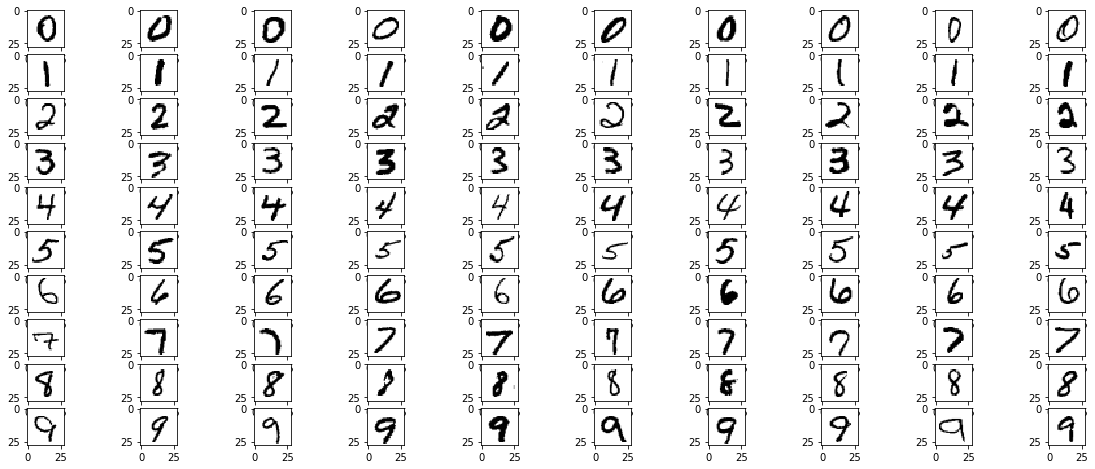

In [3]:
#def P1(num_examples=10):

### STUDENT START ###

array2d = [list() for f in range(10)] # We have Ten Empty Rows

label_index = 0

#Loop through top 200 mini training labels to quickly get the first 10 samples for each digit
#Used top 200 instead of top 100 because the top 100 might not have even frequency distribution of 10 digits and 10 samples
#for performance, we will not get more if we have 10 samples for each digit.

for label in mini_train_labels[0:200]:
        digit = int(label)
        #if we have 10 samples, don't get more
        if len(array2d[digit]) < 10:
            array2d[digit].append(label_index)
            label_index = label_index + 1
        else:
            label_index = label_index + 1

plt.figure(figsize=(20,8))

#print the 10x10 matrix of digits using matplot libraries
#loop through the matrix of rows and columns in the array
index = 0
for i in range(len(array2d)):
    for j in range(len(array2d[i])):
        plt.subplot(10, 10, index + 1)
        plt.imshow(np.reshape(mini_train_data[array2d[i][j]], (28,28)), cmap = "binary")
        index = index + 1

### STUDENT END ###

#P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show teh performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [7]:

class Performance:
    pass #allows dynamically create properties


k_values = [1, 3, 5, 7, 9]

#function takes k_values and returns predicted values for each k
def P2(k_values):
    for k in k_values:
        model = KNNClassifyScore(k, mini_train_data, mini_train_labels, dev_data, dev_labels)
        modelList.append(model)
        print('For k = ', k, ', accuracy = ', model.score)

    print(' ')
    print('Classification Report for k = 1')   
    print(classification_report(dev_labels, modelList[0].predicted_values))
      
#function returns score
def KNNClassifyScore(n_neighbors, train_data, train_labels, dev_data, dev_labels):
    neigh = KNeighborsClassifier(n_neighbors)
    neigh.fit(train_data, train_labels)
    model_perf = Performance()
    model_perf.n_neighbors = n_neighbors
    model_perf.score = neigh.score(dev_data, dev_labels)
    model_perf.predicted_values = neigh.predict(dev_data)
    return model_perf

#function returns predicted values
def KNNClassify(n_neighbors, train_data, train_labels, dev_data, dev_labels):
    neigh = KNeighborsClassifier(n_neighbors)
    neigh.fit(train_data, train_labels)
    predicted_values_1 = neigh.predict(dev_data)
    return predicted_values_1


modelList = []

P2(k_values)



For k =  1 , accuracy =  0.884
For k =  3 , accuracy =  0.876
For k =  5 , accuracy =  0.882
For k =  7 , accuracy =  0.877
For k =  9 , accuracy =  0.875
 
Classification Report for k = 1
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



### Answer: 
Based on the above accuracy scores, k = 1 seems to perform the best because it has the highest accuracy score. 

The most difficult digit based on the lowest f1-score and recall is 8. If precision is used instead, 9 is the most difficult digit because it has the lowest precision 

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [ ]:
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
#adding the last three values 60k, 120k, 1M for the sake of "actual" accuracies for Part 4

#def P3(train_sizes, accuracies):

### STUDENT START ###

#pulling data again so that this cell can be run independently irrespective of any manipulations in the above cells.

X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

dev_data, dev_labels = X[60000:61000], Y[60000:61000]

In [85]:
#This will take a good 15-20 minutes to run. Output below

elapsed_time = [0,0,0,0,0,0,0,0,0,0,0,0] #np.zeros(10)
accuracies = [0,0,0,0,0,0,0,0,0,0,0,0] # 12 accuracy items corresponding to 12 training sizes
index = 0

#compute the accuracy and time for each training size
for size in train_sizes:

    train_data2, train_labels2 = X[0:size], Y[0:size]
    neigh = KNeighborsClassifier(n_neighbors=1)
    start = time.time() #start timer
    neigh.fit(train_data2, train_labels2)
    predicted_values_dev = neigh.predict(dev_data)
    accuracies[index] = neigh.score(dev_data, dev_labels)
    end = time.time() #end timer
    elapsed_time[index] = end - start
    index = index + 1

    
print('accuracies:', accuracies)
print('elapsed_time:', elapsed_time)


### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
#accuracies = []
#P3(train_sizes, accuracies)

accuracies: [0.631, 0.691, 0.777, 0.822, 0.859, 0.891, 0.904, 0.924, 0.944, 0, 0, 0]
elapsed_time: [0.9365975856781006, 1.2645418643951416, 2.5234031677246094, 4.844974517822266, 9.563762903213501, 19.724672317504883, 39.291799783706665, 80.72215294837952, 164.96398258209229, 0, 0, 0]


### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

[0.631 0.691 0.777 0.822 0.859 0.891 0.904 0.924 0.944]

Linear Regression with no transformation:
Coefficient:  [8.42043144e-06] , intercept:  0.7791906614785993
Variance score R-squared: 0.44

Linear Regression with odds transformation of accuracies:
Coefficient:  [5.85625291] , intercept:  -11.570051377087216
Variance score R-squared: 0.93


Accuracies [0.631, 0.691, 0.777, 0.822, 0.859, 0.891, 0.904, 0.924, 0.944, 0.9425683792119928, 0.9478485399175652, 0.9592957614250294]


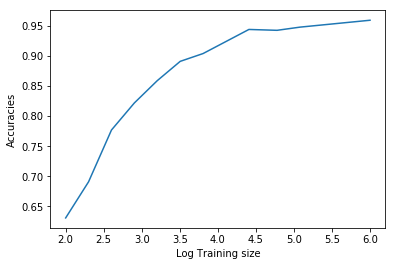

In [44]:
#def P4():

### STUDENT START ###
#Regress function takes training size array, accuracy array and X, the new training sizes; Returns Y, the predicted accuracies
def Regress(train_sizes, accuracies, predict_train_sizes):
    regr = LinearRegression()
    regr.fit(train_sizes, accuracies)
    print('Coefficient: ', regr.coef_, ', intercept: ', regr.intercept_)
    print('Variance score R-squared: %.2f' % regr.score(train_sizes, accuracies))
    predicted_accuracies = regr.predict(predict_train_sizes)
    #print('Predicted Accuracies: ' , predicted_accuracies)
    return predicted_accuracies
    
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
predict_train_sizes = [60000, 120000, 1000000]
predict_train_sizes = np.array(predict_train_sizes)[:, np.newaxis]


train_sizes_redim = np.array(train_sizes)[:, np.newaxis]
accuracies_copy = np.copy(accuracies[0 : 9]) # copying accuracies to keep problem3 values as they are
print(accuracies_copy)
accuracies_redim = np.array(accuracies_copy)
print('\nLinear Regression with no transformation:')
Regress(train_sizes_redim, accuracies_redim, predict_train_sizes)


log_train_sizes = np.log10(train_sizes_redim)
log_predict_train_sizes = np.log10(predict_train_sizes)

#apply odds transformation; odds(y) = y/(1-y) as R-sq is very low without transformation;
for index in range(len(accuracies_copy)):
    accuracies_copy[index] =  accuracies_copy[index]/(1-accuracies_copy[index])
     

#Transform accuracy range from [0:infinity] to [0:1] using the odds function odds(y)=y/1-y
accuracies_odds_redim = np.array(accuracies_copy)
print('\nLinear Regression with odds transformation of accuracies:')
predicted_accuracies = Regress(log_train_sizes, accuracies_odds_redim, log_predict_train_sizes)


#odds(y) = y/(1-y); therefore, y = odds(y)/(1+odds(y))
for index in range(len(predicted_accuracies)):
    predicted_accuracies[index] = predicted_accuracies[index]/(1 + predicted_accuracies[index])

accuracies[9] = predicted_accuracies[0] #accuracy for 60000
accuracies[10] = predicted_accuracies[1] #accuracy for 120000
accuracies[11] = predicted_accuracies[2] #accuracy for 1000000

print('\n\nAccuracies', accuracies)
log_train_sizes = np.append(log_train_sizes, log_predict_train_sizes)
predicted_accuracies = np.append(accuracies_copy, predicted_accuracies)

train_sizes_all = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 60000, 120000, 1000000]

line_chart1 = plt.plot(log_train_sizes, accuracies)
#line_chart2 = plt.plot(train_sizes_all, accuracies)
plt.xlabel('Log Training size')
plt.ylabel('Accuracies')
plt.show()

#print('Blue color represents the transformed accuracies plot')
#print('Orange color represents the normal accuracies plot')
### STUDENT END ###

#P4()

ANSWER: We approach this problem in two steps. 

Step 1: Perform regression of training sizes (X) vs accuracies (Y). 
When we perform regression, we realize that the R-squared is very low, at .44. Furthermore, the accuracy is > 1. Given that accuracy is a probability, it cannot be greater than 1. Therefore, we transform the accuracies to map from an infinite range to a probabilistic range of 0 to 1 using the odds transform function in step 2. We also apply logs to the training sizes to make it linear

Step 2: Perform regression of log training sizes (log X) vs odds of accuracies (odds of Y). 
We observe that log transformation of training sizes and odds transformation of accuracies will give an R-squared of 0.93. Unraveling accuracy scores will make us realize that the scores are probabilistic in nature, ranging between 0 to 1.


### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

In [63]:
#def P5():

### STUDENT START ###
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(mini_train_data, mini_train_labels)
predicted_values_dev = neigh.predict(dev_data)
print('Performance: ')
print(classification_report(dev_labels, predicted_values_dev))
print('Confusion Matrix: ')
print(confusion_matrix(dev_labels, predicted_values_dev))

### STUDENT END ###

#P5()

Performance: 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94        85
           1       0.83      1.00      0.91       126
           2       0.91      0.74      0.82       116
           3       0.87      0.79      0.83       107
           4       0.89      0.74      0.81       110
           5       0.82      0.85      0.84        87
           6       0.90      0.95      0.93        87
           7       0.80      0.89      0.84        99
           8       0.80      0.72      0.76        89
           9       0.72      0.81      0.76        94

   micro avg       0.84      0.84      0.84      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.85      0.84      0.84      1000

Confusion Matrix: 
[[ 81   0   0   1   0   1   1   1   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  3   8  86   3   1   0   2   8   5   0]
 [  0   1   4  85   0   5   0   3   8   1]
 [  0   2   1   0  81   0   2   1   


Incorrect Predictions of 4 and 9: 23


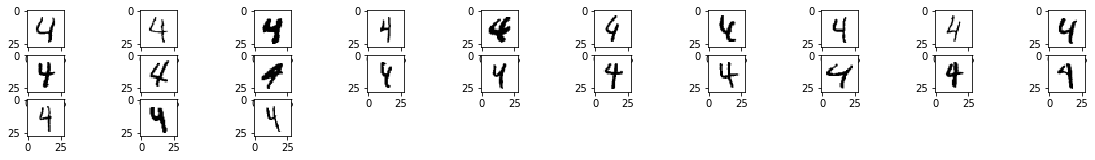

In [83]:
#confusion matrix shows that 4 is incorrectly predicted as 9 23 times.
incorrect_predictions = 0
index = 0

plt.figure(figsize=(20,8))

for i in range(len(dev_labels)):
    if (dev_labels[i] == '4' and predicted_values_dev[i] == '9'):
        plt.subplot(10, 10, index + 1)
        plt.imshow(np.reshape(dev_data[i], (28,28)), cmap = "binary")
        index = index + 1
        #print('(', dev_labels[i], ',', predicted_values_dev[i], ')')
        incorrect_predictions = incorrect_predictions + 1
    
print('\nIncorrect Predictions of 4 as 9:', incorrect_predictions, ' times')


ANSWER: 

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Produce four 1-Nearest Neighbor models by applying your blur filter in four ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [ ]:
#Get a copy as we will be manipulating this copy and don't want to impact other problem sets. 
#Apologize for the slowness for the sake of accuracy

X1, Y1 = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X1 = X1 / 255.0

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]

shuffle = np.random.permutation(np.arange(X.shape[0]))
X1, Y1 = X1[shuffle], Y1[shuffle]


In [86]:
#Function takes the average of all adjancent pixels and returns the blurred pixels
def BlurPixels(Blur_X):
    for i in range(len(Blur_X)):
            for j in range(2, len(Blur_X[i]) - 1 ):
                for k in range(2, len(Blur_X[i][j]) - 1):
                    Blur_X[i][j][k] = Blur_X[i][j][k] + Blur_X[i][j][k+1] + Blur_X[i][j][k-1] + Blur_X[i][j+1][k] + Blur_X[i][j-1][k] + Blur_X[i][j-1][k-1] + Blur_X[i][j+1][k+1] + Blur_X[i][j-1][k+1] + Blur_X[i][j+1][k-1]
                    Blur_X[i][j][k] = Blur_X[i][j][k] / 8                
    return Blur_X



X1 = X.copy() # take a copy of the original dataset so we can keep the blurred pixel dataset separate
X1 = np.reshape(X1, (70000, 28, 28))
Blur_X = BlurPixels(X1)
X1 = np.reshape(Blur_X, (70000, 784))


# Set some variables to hold test, dev, and training data.
blur_test_data, blur_test_labels = X1[61000:], Y[61000:]
blur_dev_data, blur_dev_labels = X1[60000:61000], Y[60000:61000]
blur_train_data, blur_train_labels = X1[:60000], Y[:60000]
blur_mini_train_data, blur_mini_train_labels = X1[:1000], Y[:1000]



#function takes training data and dev data and returns an accuracy score for dev data
def KNNClassify(n_neighbors, train_data, train_labels, dev_data, dev_labels):
    #for index, (image, label) in enumerate(zip(blur_mini_train_data[0:100], blur_mini_train_data[0:100])):
    #     plt.subplot(10, 10, index + 1)
    #     plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(train_data, train_labels)
    predicted_values_dev = neigh.predict(dev_data)
    return neigh.score(dev_data, dev_labels)





In [94]:
#def P6():
    
### STUDENT START ###

#case 1: do not use the filter
accuracy_no_filter = KNNClassify(1, mini_train_data, mini_train_labels, dev_data, dev_labels)
print('Accuracy without filter:', accuracy_no_filter)


#case 2: Filter the training data but not the dev data
#Assumption: Training data above means the entire training data set and not just the mini_train_data
blur_mini_train_data = Blur_X[:1000] #pick the first 1000
blur_mini_train_data = np.reshape(blur_mini_train_data, (1000, 784)) #reshape from a 3d to a 2d
blur_mini_train_labels =  Y[:1000]
dev_data = np.reshape(dev_data, (1000, 784))
accuracy_training_filter = KNNClassify(1, blur_mini_train_data, blur_mini_train_labels, dev_data, dev_labels)
print('Accuracy with training filter:', accuracy_training_filter)


#case 3: Filter the dev data but not the training data
accuracy_dev_filter = KNNClassify(1, mini_train_data, mini_train_labels, blur_dev_data, dev_labels)
print('Accuracy with dev filter:', accuracy_dev_filter)


#case 4: Filter both dev and training data
accuracy_dev_training_filter = KNNClassify(1, blur_mini_train_data, blur_mini_train_labels, blur_dev_data, dev_labels)
print('Accuracy with both training and dev filter:', accuracy_dev_training_filter)
train_data, train_labels = X[:60000], Y[:60000]

### STUDENT END ###
#89%, 92%
#P6()

Accuracy without filter 0.844
Accuracy with training filter 0.847
Accuracy with dev filter 0.86
Accuracy with both training and dev filter 0.856



Matrix Before Blurring


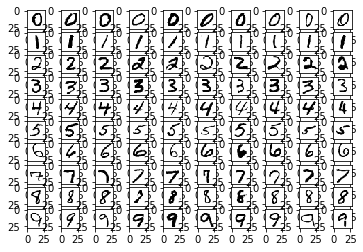

In [100]:
#Function prints a visual matrix of numbers based on pixel inputs and labels in the sorted order
def print_visual(visual_data, visual_labels):
    array2d = [list() for f in range(10)] # We have Ten Empty Rows
    #lets add an item into the first row
    label_index = 0
    for label in mini_train_labels[0:200]:
        digit = int(label)
        if len(array2d[digit]) < 10:
            array2d[digit].append(label_index)
            label_index = label_index + 1
        else:
            label_index = label_index + 1

    index = 0
    for i in range(len(array2d)):
        for j in range(len(array2d[i])):
            plt.subplot(10, 10, index + 1)
            plt.imshow(np.reshape(mini_train_data[array2d[i][j]], (28,28)), cmap = "binary")
            index = index + 1

    return array2d
  
print('\nMatrix Before Blurring')
#Before Blurring, print matrix with just the mini_train_data set
array2d = print_visual(mini_train_data, mini_train_labels)





Matrix After Blurring, not sorted. Provided for intuition only


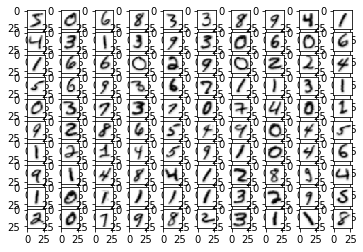

In [103]:
print('\nMatrix After Blurring, not sorted. Provided for intuition only')
#After Blurring, print matrix with the *blurred* mini_train_data set
index = 0
for i in range(len(array2d)):
    for j in range(len(array2d[i])):
        plt.subplot(10, 10, index + 1)
        plt.imshow(np.reshape(blur_mini_train_data[array2d[i][j]], (28,28)), cmap = "binary")
        index = index + 1


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [9]:
#def P7():

### STUDENT START ###

#BernoulliNB
def BernoulliNBTrain(mini_train_data, mini_train_labels, dev_data, dev_labels):
    binomial = BernoulliNB(alpha=.01, binarize=0.5, class_prior=None, fit_prior=True)
    binomial.fit(mini_train_data, mini_train_labels)
    binomial.predict(dev_data)
    naive_bayes_score = binomial.score(dev_data, dev_labels, sample_weight=None)
    print('Naive Bayes Accuracy Score with pixel values 0 or 1: ', naive_bayes_score)
    return binomial

BernoulliNBTrain(mini_train_data, mini_train_labels, dev_data, dev_labels)

def Multinomial_Transform_Pixels(M_X, threshold1, threshold2):
        for i in range(len(M_X)):
            for j in range(2, len(M_X[i]) - 1 ): #ignoring one pixel at the edge for the sake of programming ease and because there is generally no information
                for k in range(2, len(M_X[i][j]) - 1):
                    if M_X[i][j][k] <= threshold1:
                        M_X[i][j][k] = 0
                    elif M_X[i][j][k] > threshold1 and M_X[i][j][k] <= threshold2:
                        M_X[i][j][k] = 1 
                    else:
                        M_X[i][j][k] = 2                       
        return M_X

#MultinomialNB

white_threshold = .1 #Upper threshold from 0, for white
black_threshold = .9 #lower threshold from 1, for black
Run multinomial NB for different thresholds of white and black pixels to get the maximum accuracy
while(white_threshold < 0.5 and black_threshold > 0.5):
    M_X = np.reshape(mini_train_data, (1000, 28, 28))
    M_mini_train_data = Multinomial_Transform_Pixels(M_X, white_threshold, black_threshold)
    M_mini_train_data = np.reshape(M_mini_train_data, (1000, 784))

    multinomial = MultinomialNB(alpha = 1.0, class_prior=None, fit_prior=True)
    multinomial.fit(train_data, mini_train_labels)
    multinomial.predict(dev_data)
    multinomial_score = multinomial.score(dev_data, dev_labels, sample_weight = None)
    print('Multinomial Accuracy Score with pixel values 0, 1, 2: ', multinomial_score, 'white:', white_threshold, 'black:', black_threshold)
    white_threshold = white_threshold + .05
    black_threshold = black_threshold - .05

### STUDENT END ###

#P7()

Naive Bayes Accuracy Score with pixel values 0 or 1:  0.829
Multinomial Accuracy Score with pixel values 0, 1, 2:  0.807 white: 0.1 black: 0.9
Multinomial Accuracy Score with pixel values 0, 1, 2:  0.797 white: 0.15000000000000002 black: 0.85
Multinomial Accuracy Score with pixel values 0, 1, 2:  0.797 white: 0.2 black: 0.7999999999999999
Multinomial Accuracy Score with pixel values 0, 1, 2:  0.797 white: 0.25 black: 0.7499999999999999
Multinomial Accuracy Score with pixel values 0, 1, 2:  0.797 white: 0.3 black: 0.6999999999999998
Multinomial Accuracy Score with pixel values 0, 1, 2:  0.797 white: 0.35 black: 0.6499999999999998
Multinomial Accuracy Score with pixel values 0, 1, 2:  0.797 white: 0.39999999999999997 black: 0.5999999999999998
Multinomial Accuracy Score with pixel values 0, 1, 2:  0.797 white: 0.44999999999999996 black: 0.5499999999999997


ANSWER: Multinomial accuracy of 0.791 is not more than naive bayes accuracy of 0.82. It is interesting to see that the multinomial accuracy does not change despite changing thresholds.

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [108]:
#def P8(alphas):

### STUDENT START ###

binomial = BernoulliNB(alpha=1.0, binarize=0.5, class_prior=None, fit_prior=True)
 
alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
grid_search = GridSearchCV(estimator=binomial, param_grid=alphas, cv = 5)
grid_search.fit(mini_train_data, mini_train_labels)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best alpha = ", grid_search.best_params_)


### STUDENT END ###

# alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
# nb = P8(alphas)


Best score: 0.825
Best alpha =  {'alpha': 0.0001}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


ANSWER: The best value of alpha seems to be 0.0001 and the best score seems to be 0.825. When the value of alpha is close to 0, the best score is expected compared with an alpha much higher than 0. The reason is that applying a heavy smoothing factor will skew the predictions significantly while applying a very low smoothing factor will not smooth the predictions at all.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [7]:
#def P9():

### STUDENT END ###

smoothing = [1.0e-10, 0.0001, 0.001, 0.01, 0.06, 0.1, 0.5, 0.75, 0.9, 1.0]

rows, cols = (10, 784) 
sigma = 0.5

for smooth in smoothing:
    sigma = 0.5
    while (sigma < 1):
        guassian = GaussianNB(priors=None, var_smoothing=smooth)
        guassian.fit(mini_train_data, mini_train_labels)
        guassian.sigma_ = np.array([[sigma]*cols]*rows) #
        print('Smoothing Factor:', smooth, 'Sigma', sigma  ,' Guassian score', guassian.score(dev_data, dev_labels)) #'Sigma' ,guassian.sigma_, 'theta', guassian.theta_)
        sigma = sigma + .05
        

### STUDENT END ###
 
#P9()

Smoothing Factor: 1e-10 Sigma 0.5  Guassian score 0.801
Smoothing Factor: 1e-10 Sigma 0.55  Guassian score 0.801
Smoothing Factor: 1e-10 Sigma 0.6000000000000001  Guassian score 0.801
Smoothing Factor: 1e-10 Sigma 0.6500000000000001  Guassian score 0.801
Smoothing Factor: 1e-10 Sigma 0.7000000000000002  Guassian score 0.801
Smoothing Factor: 1e-10 Sigma 0.7500000000000002  Guassian score 0.801
Smoothing Factor: 1e-10 Sigma 0.8000000000000003  Guassian score 0.799
Smoothing Factor: 1e-10 Sigma 0.8500000000000003  Guassian score 0.799
Smoothing Factor: 1e-10 Sigma 0.9000000000000004  Guassian score 0.799
Smoothing Factor: 1e-10 Sigma 0.9500000000000004  Guassian score 0.799
Smoothing Factor: 0.0001 Sigma 0.5  Guassian score 0.801
Smoothing Factor: 0.0001 Sigma 0.55  Guassian score 0.801
Smoothing Factor: 0.0001 Sigma 0.6000000000000001  Guassian score 0.801
Smoothing Factor: 0.0001 Sigma 0.6500000000000001  Guassian score 0.801
Smoothing Factor: 0.0001 Sigma 0.7000000000000002  Guassian 

ANSWER:
Gaussian NB does a good job when the input data is Guassian. However, the input data is not Gaussian/normal in nature.

#Whites are 0 and blacks are 1. Averages are not 0.5 and distribution is not a nice curve.

We experiment by setting the standard deviation values manually. The mean stays the same for the best results. We are only increasing or reducing the height of the Gaussian curve.

We note that the best Gaussian score is around 0.801


### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

Naive Bayes Accuracy Score with pixel values 0 or 1:  0.792


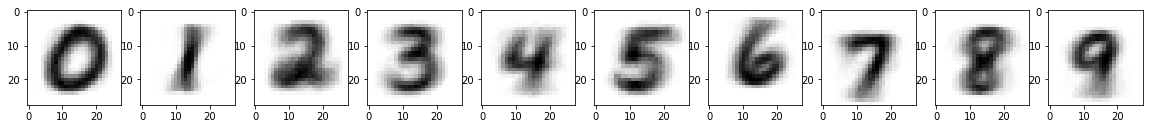

In [140]:
#def P10(num_examples)
#Breaking this problem into two sets: One to generate training digit images and the other to generate randomized digit images
binomial = BernoulliNBTrain(mini_train_data, mini_train_labels, dev_data, dev_labels)
random = np.random.rand(1, 20)

#Extract feature log probabilities and compute the feature probabilities
feature_prob = binomial.feature_log_prob_.copy()

plt.figure(figsize=(20,8))
index = 0
for digit in range(0,10):
    k = 0
    for prob_index in range(len(feature_prob[digit])):
        prob = np.exp(feature_prob[digit][prob_index])
        grid[digit][k] = prob
        k = k + 1

    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(grid[digit], (28,28)), cmap = "binary")   
    index = index + 1

In [153]:
def P10(num_examples):

### STUDENT START ###

#for each of the digits from 0 to 9
#Loop 20 times to print 20 samples of each digit
#Generate a random number
#Compare the random number to the feature probability
#If the probability is less than the random number, set the pixel value to 0 else to 1
#print the grid

    plt.figure(figsize=(20,8))
    grid = np.empty(shape=(200,784)) 
    #manually generate grid labels (10 of each digit since we know they are in sorted order)
    k = 0
    for i in range(0,11):
        for j in range(1,21):
            grid_labels[k] = i
            k = k + 1
        
        
    print(grid_labels)
    
    index = 0
    multiple = 1
    for digit in range(0,10):
        multiple = multiple + 1
        pixel_pointer = digit * multiple + 1
        for repeat in range(0,num_examples):
            k = 0
            for prob_index in range(len(feature_prob[digit])):
                random = np.random.rand()
                prob = np.exp(feature_prob[digit][prob_index])
                if prob > random:
                    grid[pixel_pointer][k] = 1
                else:
                    grid[pixel_pointer][k] = 0
                k = k + 1

            plt.subplot(10, 20, index + 1)
            plt.imshow(np.reshape(grid[pixel_pointer], (28,28)), cmap = "binary")   
            index = index + 1


    binomial = BernoulliNBTrain(grid, grid_labels, dev_data, dev_labels)

        

### STUDENT END ###

P10(20)

IndexError: index 200 is out of bounds for axis 0 with size 200

<Figure size 1440x576 with 0 Axes>

ANSWER: Let's compare the generated digits to the training digits by observing the first and the second set of images. 

The first set of images are much smoother and more legible compared with the second set of images. Perhaps, randomizing every single pixel in every single digit could have had some impact. 

To actually compare the two samples, we need to compute the accuracy score for both the sets like in other problems above. Whichever model has a higher accuracy score with the right calibration performs better. 

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [83]:
#def P11(buckets, correct, total):
    
### STUDENT START ###

#Step 1: Train with Bernoulli on mini training data set and fit with development data
#Step 2: Sort the observations indices into different buckets without concern for actual accuracies
#Step 3: One bucket at a time, check for accuracy on those indices by comparing the prediction with dev label


binomial = BernoulliNBTrain(mini_train_data, mini_train_labels, dev_data, dev_labels)
predicted_values = binomial.predict(dev_data)
classes = binomial.predict_proba(dev_data)
buckets = [list() for f in range(9)] #9 empty rows

index = 0

#Save indices of dev_data into different buckets based off max probabilities.
for probabilities in classes:
    max_prob = max(probabilities)
    if (max_prob < 0.5):
        buckets[0].append(index)
    elif (max_prob < 0.9):
        buckets[1].append(index)
    elif (max_prob < 0.999):
        buckets[2].append(index)
    elif (max_prob < 0.99999):
        buckets[3].append(index)
    elif (max_prob < 0.9999999):
        buckets[4].append(index)
    elif (max_prob < 0.999999999):
        buckets[5].append(index)
    elif (max_prob < 0.99999999999):
        buckets[6].append(index)
    elif (max_prob < 0.9999999999999):
        buckets[7].append(index)
    elif (max_prob <= 1):
        buckets[8].append(index)
    
    index = index + 1

#compute correct, total and accuracy values for each bucket
#accuracy = correct/total
pointer = -1
correct = np.zeros(9)
total = np.zeros(9)
accuracy = np.zeros(9)
for i in range(len(buckets)):
    for j in range(len(buckets[i])):
        pointer = buckets[i][j]
        #compare labels with predictions for each of the indices in the buckets
        if dev_labels[pointer] == predicted_values[pointer]:
            correct[i] = correct[i] + 1
            
        total[i] = total[i] + 1
    if (total[i] > 0):
        accuracy[i] = correct[i]/total[i]

print('\nCorrect for each bucket:' , list(correct))
print('\nTotal for each bucket:', list(total))
print('\nAccuracy for each bucket (correct[i]/total[i]):', list(accuracy))


       

Naive Bayes Accuracy Score with pixel values 0 or 1:  0.792

Correct for each bucket: [0.0, 19.0, 42.0, 48.0, 58.0, 62.0, 62.0, 55.0, 446.0]

Total for each bucket: [0.0, 50.0, 97.0, 84.0, 83.0, 80.0, 75.0, 58.0, 473.0]

Accuracy for each bucket (correct[i]/total[i]): [0.0, 0.38, 0.4329896907216495, 0.5714285714285714, 0.6987951807228916, 0.775, 0.8266666666666667, 0.9482758620689655, 0.9429175475687104]


ANSWER: 

We see that the bernoulli model starts at a very low accuracy of .38 or 38% for the bucket of values between 0.5 and 0.9. Since the probability does not match up to the accuracy, the model is not well calibrated at the range of probabilities 0.5 and 0.9. 

We also realize that as the probability bucket goes to the highest threshold, the accuracy rate is at 94%, which is still not perfect but significantly better than at any probability < 90%. 

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [84]:
#def P12():

### STUDENT START ###


#function averages the pixel values in each row
def BlurPixels_Average_By_Row(Blur_X):
    for i in range(len(Blur_X)):
            for j in range(2, len(Blur_X[i]) - 1 ):
                sum = 0
                
                for k in range(2, len(Blur_X[i][j]) - 1):
                    sum = sum + Blur_X[i][j][k] 
                
                for k in range(2, len(Blur_X[i][j]) - 1):
                    Blur_X[i][j][k] = sum / 28
                
    return Blur_X

#function averages the pixel values in each column
def BlurPixels_Average_By_Column(Blur_X):
    for i in range(len(Blur_X)):
        for k in range(2, 27):
            sum = 0
            for j in range(2, 27 ):
                sum = sum + Blur_X[i][j][k] 
                
            for j in range(2, len(Blur_X[i]) - 1 ):
                Blur_X[i][j][k] = sum / 28 
            
    return Blur_X


#Create a couple of copies of the digits dataset for manipulation
X2 = X.copy()
X2 = np.reshape(X2, (70000, 28, 28))
Blur_X2 = BlurPixels_Average_By_Column(X2)
X2 = np.reshape(Blur_X2, (70000, 784))

dev_data2, dev_labels2 = X2[60000:61000], Y[60000:61000]
mini_train_data2, mini_train_labels2 = X2[:1000], Y[:1000]
print('Training by averaging pixel values in each row')
binomial = BernoulliNBTrain(mini_train_data2, mini_train_labels2, dev_data2, dev_labels2)

X3 = X.copy()
X3 = np.reshape(X3, (70000, 28, 28))
Blur_X3 = BlurPixels_Average_By_Row(X3)
X3 = np.reshape(Blur_X3, (70000, 784))
dev_data3, dev_labels3 = X3[60000:61000], Y[60000:61000]
mini_train_data3, mini_train_labels3 = X3[:1000], Y[:1000]
print('Training by averaging pixel values in each column')
binomial = BernoulliNBTrain(mini_train_data3, mini_train_labels3, dev_data3, dev_labels3)


### STUDENT END ###

#P12()

Training by averaging pixel values in each row
Naive Bayes Accuracy Score with pixel values 0 or 1:  0.237
Training by averaging pixel values in each column
Naive Bayes Accuracy Score with pixel values 0 or 1:  0.192


ANSWER: The above accuracy scores look terribly low. Perhaps, we could look at a few other combinations to improve the score.